In [1]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
!pip install Kaggle

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 40.9 MB/s eta 0:00:00
  Created wheel for Kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111943 sha256=1969726304389f7ae7b69201bc3b16d0279fb62d26e7b436004df51f56937bb0
  Stored in directory: /home/trusted-service-user/.cache/pip/wheels/53/34/8c/8ca3450d17206d9e37e1ee3aeb47cbb2873d22a9e0c60eb137
Successfully built Kaggle


In [2]:
import os
os.chdir('/lakehouse/default/Files')
os.environ['KAGGLE_USERNAME'] = 'bennyifeanyi'
os.environ['KAGGLE_KEY'] = '050019167fbe0027359cdb4b5eea50fe'
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_file('vjchoudhary7/customer-segmentation-tutorial-in-python', 'Mall_Customers.csv')

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 4, Finished, Available)

False

In [4]:
import pandas as pd
df = pd.read_csv("/lakehouse/default/" + "Files/Mall_Customers.csv")
df.head()

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 6, Finished, Available)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Code generated by Data Wrangler for pandas DataFrame

def clean_data(df):
    # Convert text to lowercase in column: 'Gender'
    df['Gender'] = df['Gender'].str.lower()
    # Rename column 'Spending Score (1-100)' to 'Spending Score'
    df = df.rename(columns={'Spending Score (1-100)': 'SpendingScore'})
    # Rename column 'Annual Income (k$)' to 'Annual Income'
    df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 38, Finished, Available)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40


In [9]:
sparkdf = spark.createDataFrame(df_clean)
display(sparkdf)

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 39, Finished, Available)

SynapseWidget(Synapse.DataFrame, f2e7211b-7c43-484d-bd5b-21752aebae42)

In [10]:
sparkdf.write.format("delta").mode("overwrite").saveAsTable("malldatadf")

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 40, Finished, Available)

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = df_clean[['AnnualIncome', 'SpendingScore']]
# Feature normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 41, Finished, Available)

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 42, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
2024-02-25:09:03:19,661 WARNING  [tracking_store.py:153] log_inputs not supported


KMeans(n_clusters=5, random_state=42)

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 43, Finished, Available)

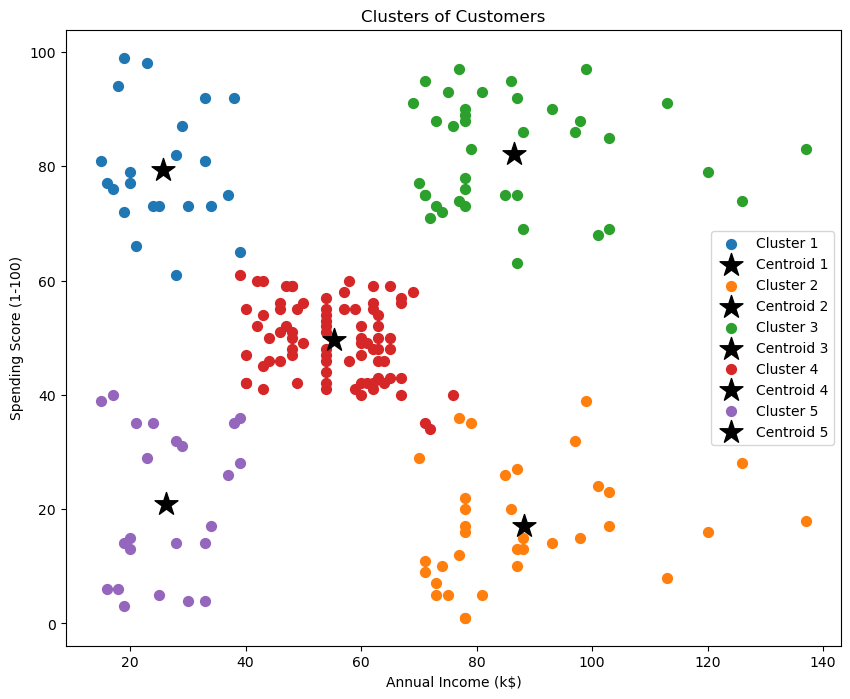

In [13]:
plt.figure(figsize=(10, 8))
for cluster_label in range(5):  # Loop through each cluster label
    cluster_points = X[kmeans.labels_ == cluster_label]
    centroid = cluster_points.mean(axis=0)  # Calculate the centroid as the mean position of the data points
    plt.scatter(cluster_points['AnnualIncome'], cluster_points['SpendingScore'],
                s=50, label=f'Cluster {cluster_label + 1}')  # Plot points for the current cluster
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')  # Plot the centroid
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
# Create a new DataFrame to store the clustering results
cluster_df = pd.DataFrame(data=X, columns=['AnnualIncome', 'SpendingScore'])
cluster_df['Cluster'] = cluster_label
cluster_df.head()

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 48, Finished, Available)

,CustomerID,AnnualIncome,SpendingScore,Cluster
0,NaN,15,39,4
1,NaN,15,81,4
2,NaN,16,6,4
3,NaN,16,77,4
4,NaN,17,40,4


In [17]:
sparkclusterdf = spark.createDataFrame(cluster_df)
sparkclusterdf.write.format("delta").mode("overwrite").saveAsTable("clusterdatadf")

StatementMeta(, 36ad1c24-b59e-4512-bdc6-7f1ae0f78adc, 47, Finished, Available)